In [ ]:
#import statements
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
#read in dataset
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
df.head()

In [ ]:
#removing unused features
columns = ['Crm Cd Desc', 'Premis Desc', 'Weapon Desc', 'Status', 'Status Desc', 'Cross Street', 'LAT', 'LON', 'Mocodes', 'Crm Cd 2', 'Weapon Used Cd', 'Crm Cd 3', 'Crm Cd 4']
df = df.drop(columns=columns)

In [ ]:
#preprocessing
df.isna().sum()

In [ ]:
#replacing nulls in vict sex and vict descent with "Unknown"
df['Vict Sex'] = df['Vict Sex'].fillna('Unknown')
df['Vict Descent'] = df['Vict Descent'].fillna('Unknown')


#dropping null rows in for Premis CD and CRM Cd 1
df = df.dropna(subset=['Premis Cd', 'Crm Cd 1'])


In [ ]:
df.dtypes

In [ ]:
# Check for duplicate rows
df.duplicated().sum()

In [ ]:
#bar chart for crimes per area
area_crimes = df['AREA NAME'].value_counts()
print(area_crimes)
plt.figure(figsize=(10, 5))
sns.barplot(x=area_crimes.index, y=area_crimes.values)
plt.title('Crime Reports by Area')
plt.xticks(rotation=45)
plt.ylabel('Number of Crimes')
plt.xlabel('Area Name')
plt.savefig('crimesPerArea.png')
plt.show()

In [ ]:
#agglomerative model
#converting to numerical values
label_encoder = LabelEncoder()
df['AREA'] = label_encoder.fit_transform(df['AREA'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Vict Age', 'TIME OCC', 'AREA']])

agg_clust = AgglomerativeClustering(n_clusters=4)
df['Cluster'] = agg_clust.fit_predict(scaled_features)
#agglomerative cluster scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Vict Age'], y=df['TIME OCC'], hue=df['Cluster'], s=50)
plt.title('Clustering of Crime Reported')
plt.xlabel('Victim Age')
plt.ylabel('Time Occurred')
plt.legend(title='Cluster')
plt.savefig('cluster1.png')
plt.show()




[[-1.25599131  0.45731885  0.02724666]
 [ 0.53066655  0.36470932 -0.95401208]
 [ 0.57073379  0.38614167  0.90637254]
 [-0.07178549 -1.503918   -0.01060498]]
Cluster
2    78418
1    75760
0    64306
3    58094
Name: count, dtype: int64
381084.2869633824


C:\Users\liyay\AppData\Local\Temp\ipykernel_25656\4122196292.py:25: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('cluster1.png')
C:\Users\liyay\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


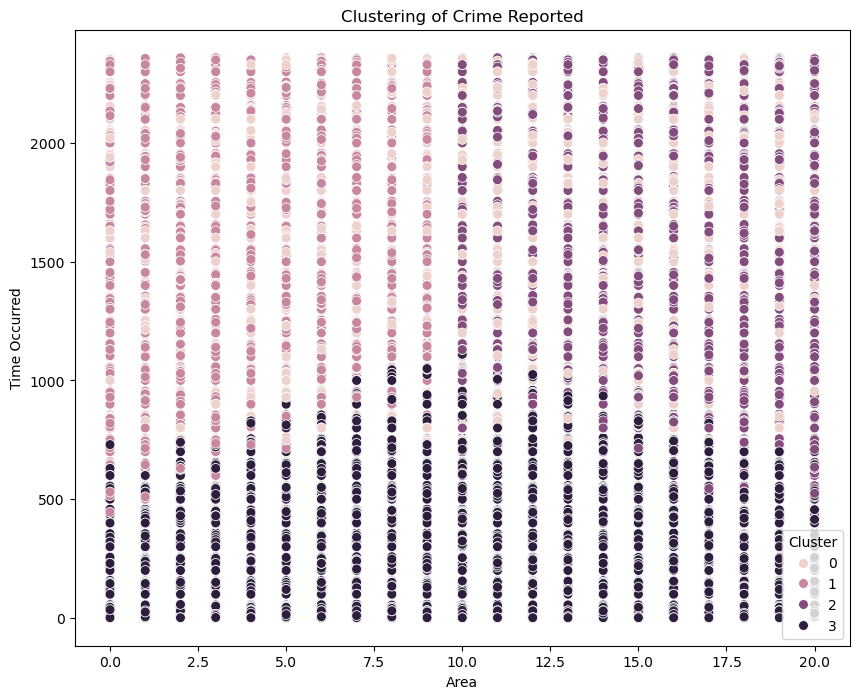

In [41]:
from sklearn.cluster import KMeans
#converting to numerical values
label_encoder = LabelEncoder()
df['AREA'] = label_encoder.fit_transform(df['AREA'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Vict Age', 'TIME OCC', 'AREA']])

#k-means
kmeans = KMeans(n_clusters=4, random_state=20)
df['Cluster'] = kmeans.fit_predict(scaled_features)

#print cluster centers and number of data points in each cluster 
print(kmeans.cluster_centers_)
print(df['Cluster'].value_counts())

#checking how well the clustering is with inertia(sum of squared distances from closest cluster center)
print(kmeans.inertia_)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['AREA'], y=df['TIME OCC'], hue=df['Cluster'], s=50)
plt.title('Clustering of Crime Reported')
plt.xlabel('Area')
plt.ylabel('Time Occurred')
plt.legend(title='Cluster')
plt.savefig('cluster1.png')
plt.show()


Cluster Sizes:
 Cluster
1    110529
3     62206
2     57697
0     46146
Name: count, dtype: int64
Cluster Centers:
 [[-0.98201198  1.09208668]
 [ 0.61594937 -0.67875849]
 [-1.15781788 -0.72213901]
 [ 0.70794257  1.06569012]]


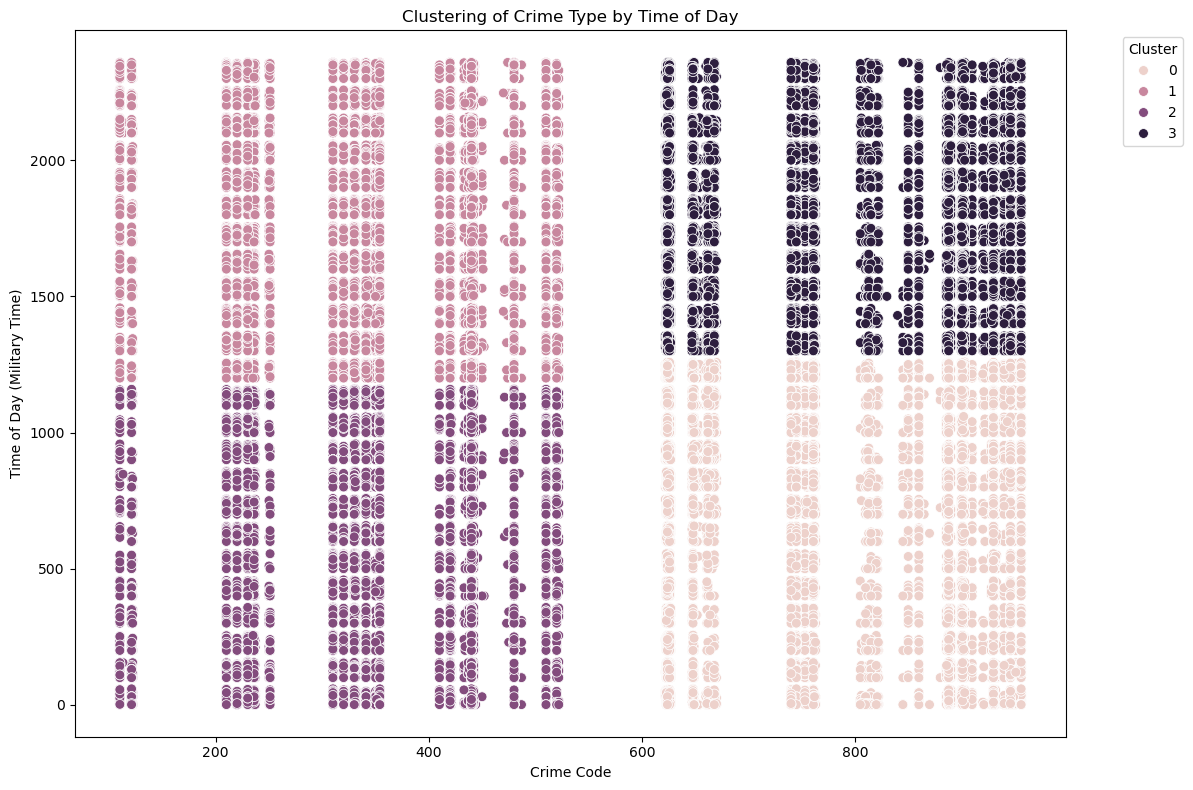

In [48]:
#crimes by area
features = ['TIME OCC', 'Crm Cd']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

kmeans = KMeans(n_clusters=4, random_state=40)
df['Cluster'] = kmeans.fit_predict(scaled_features)

print("Cluster Sizes:\n", df['Cluster'].value_counts())
print("Cluster Centers:\n", kmeans.cluster_centers_)
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df['Crm Cd'], y=df['TIME OCC'], hue=df['Cluster'], s=50)
plt.title('Clustering of Crime Type by Time of Day')
plt.xlabel('Crime Code')
plt.ylabel('Time of Day (Military Time)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('crime.png')
plt.show()